# Stochastic Oscillator

https://www.investopedia.com/terms/s/stochasticoscillator.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-09-04,223.062759,228.360001,229.179993,226.630005,228.410004,27390100
2018-09-05,221.607346,226.869995,229.669998,225.100006,228.990005,33333000
2018-09-06,217.924789,223.100006,227.350006,221.300003,226.229996,34290000
2018-09-07,216.166550,221.300003,225.369995,220.710007,221.850006,37619800
2018-09-10,213.265411,218.330002,221.850006,216.470001,220.949997,39516500


In [3]:
n = 14
smin = df['Low'].rolling(n).min()
smax = df['High'].rolling(n).max()
df['stoch_k'] = 100 * (df['Adj Close'] - smin) / (smax - smin)
d_n = 3
df['stoch_d'] = df['stoch_k'].rolling(d_n).mean()

In [4]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,stoch_k,stoch_d
Date,,,,,,,,
2018-09-04,223.062759,228.360001,229.179993,226.630005,228.410004,27390100,NaN,NaN
2018-09-05,221.607346,226.869995,229.669998,225.100006,228.990005,33333000,NaN,NaN
2018-09-06,217.924789,223.100006,227.350006,221.300003,226.229996,34290000,NaN,NaN
2018-09-07,216.166550,221.300003,225.369995,220.710007,221.850006,37619800,NaN,NaN
2018-09-10,213.265411,218.330002,221.850006,216.470001,220.949997,39516500,NaN,NaN


In [5]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume,stoch_k,stoch_d
Date,,,,,,,,
2018-12-24,143.924454,146.830002,151.550003,146.589996,148.149994,37169200,-7.445649,-6.028773
2018-12-26,154.059814,157.169998,157.229996,146.720001,148.300003,58582500,26.498111,4.573466
2018-12-27,153.059998,156.149994,156.770004,150.070007,155.839996,53117100,23.189961,14.080808
2018-12-28,153.138428,156.229996,158.520004,154.550003,157.500000,42291400,25.205653,24.964575
2018-12-31,154.618546,157.740005,159.360001,156.479996,158.529999,35003500,30.902794,26.432803


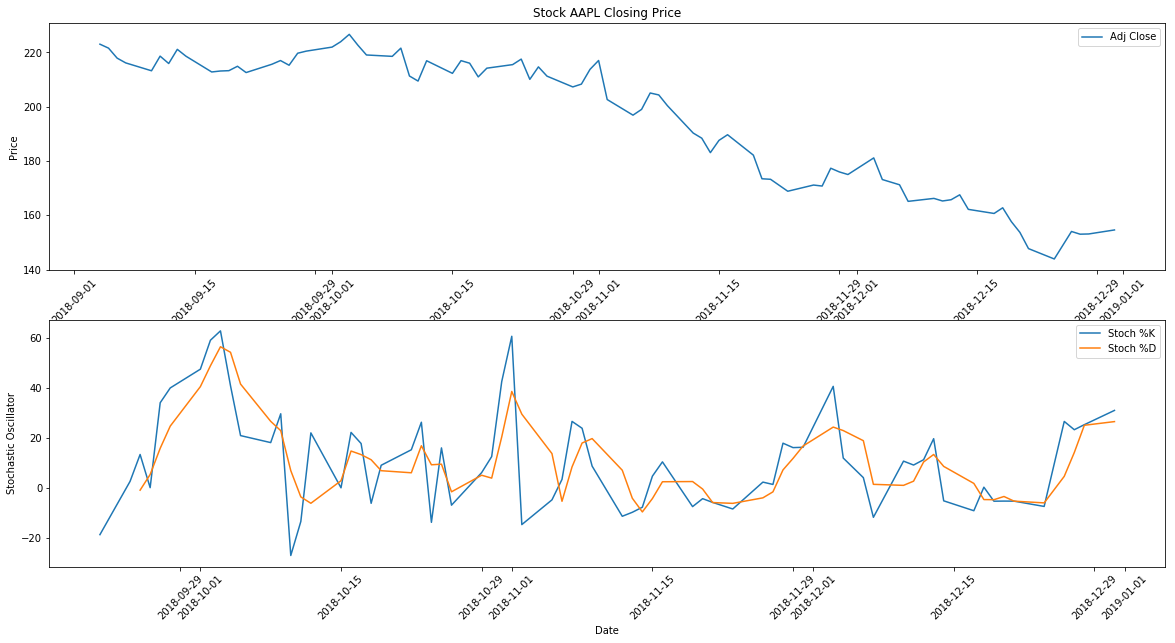

In [6]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['stoch_k'], label='Stoch %K')
ax2.plot(df['stoch_d'], label='Stoch %D')
ax2.legend(loc='best')
ax2.set_ylabel('Stochastic Oscillator')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)

## Candlestick with Stochastic Oscillator

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Adj Close,Close,High,Low,Open,Volume,stoch_k,stoch_d,VolumePositive
0,736941.0,223.062759,228.360001,229.179993,226.630005,228.410004,27390100,NaN,NaN,False
1,736942.0,221.607346,226.869995,229.669998,225.100006,228.990005,33333000,NaN,NaN,False
2,736943.0,217.924789,223.100006,227.350006,221.300003,226.229996,34290000,NaN,NaN,False
3,736944.0,216.166550,221.300003,225.369995,220.710007,221.850006,37619800,NaN,NaN,False
4,736947.0,213.265411,218.330002,221.850006,216.470001,220.949997,39516500,NaN,NaN,False


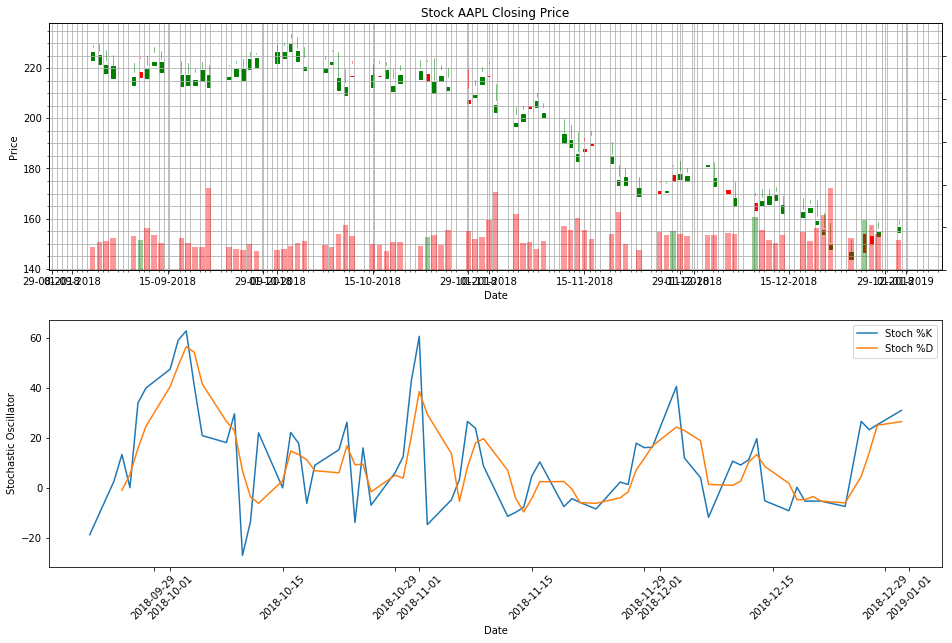

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['stoch_k'], label='Stoch %K')
ax2.plot(df['stoch_d'], label='Stoch %D')
ax2.legend(loc='best')
ax2.set_ylabel('Stochastic Oscillator')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)